# Patient demographics and presence of disease

**Author:** Miguel Xochicale [@mxochicale](https://github.com/mxochicale)   
**Contributors:** Nhat Phung Tran Huy  [@huynhatd13](https://github.com/huynhatd13)


## Introduction

This notebook presents prototypes for demographic analysis of participants.

### Running notebook
Go to echocardiography repository path: `$HOME/repositories/2022-echocardiography-proceedings/`
Open echocardiography repo in pycharm and in the terminal type:
```
git checkout master # or the branch
git pull # to bring a local branch up-to-date with its remote version
```
Launch Notebook server Go to you repository path: `cd $HOME/repositories/2022-echocardiography-proceedings/proceedings/statistica-analysis/` and type in the pycharm terminal:

```
conda activate echo-paper-ve
jupyter notebook
```
which will open your web-browser.


### Logbook
* January February and March 2022: Drafts
* August 2022: Tidies notebook and match datasets with video echoes



### References
* B. Glocker, C. Jones, M. Bernhardt, S. Winzeck. Algorithmic encoding of protected characteristics in image-based models for disease detection. 2021. pre-print arXiv:2110.14755. https://github.com/biomedia-mira/chexploration/tree/main/notebooks added 26JAN2022
* Tuan, N., Tuong, P. & Popkin, B. Body mass index (BMI) dynamics in vietnam. Eur J Clin Nutr 62, 78–86 (2008). https://doi.org/10.1038/sj.ejcn.1602675 added 21 March 2022
* Nguyen  et al.  et al. Metformin as adjunctive therapy for dengue in overweight and obese patients: a protocol for an open-label clinical trial (MeDO) [version 2; peer review: 3 approved]. Wellcome Open Res 2021, 5:160. https://wellcomeopenresearch.org/articles/5-160/v2 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7539082/pdf/wellcomeopenres-5-18074.pdf added 21 March 2022




# 2. Jupyter Notebook
## 2.1 Setting imports and datasets paths

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]

REPOSITORY_PATH='repositories/vital-ultrasound/ML4H2022'
FULL_REPO_PATH = HOME_PATH+'/'+REPOSITORY_PATH
FULL_DATA_REPO_PATH = FULL_REPO_PATH +'/data/patient_demographics_and_diseases/'
CSV_FILENAME_CSV = 'ANONYMISED_v00.csv'


## Printing Versions and paths
print(f'FULL_DATA_REPO_PATH: {FULL_DATA_REPO_PATH}' )


FULL_DATA_REPO_PATH: /home/mx19/repositories/vital-ultrasound/ML4H2022/data/patient_demographics_and_diseases/


## 2.1 Loading and filtering dataframe tables


In [2]:
pandas_anonymised_csv= pd.read_csv(FULL_DATA_REPO_PATH + CSV_FILENAME_CSV)
df_anonymised = pd.DataFrame(pandas_anonymised_csv)

## Comment/Uncomment to see Labelled vs non labelled data distributions
# df_anonymised = df_anonymised[  (df_anonymised["EVENT"] == 'All')  &  (df_anonymised["VIDEO_PATH"] == 'YES') ]
df_anonymised = df_anonymised[  (df_anonymised["EVENT"] == 'All')  &  (df_anonymised["VIDEO_PATH"] == 'YES') & (df_anonymised["LABELLED"] == 'Y') ]

# df_anonymised.head()
df_anonymised

,EVENT,USUBJID,USUBJID.1,LABELLED,VIDEO_PATH,VIDEOS,4CV_CLIPS_T1,4CV_CLIPS_T2,4CV_CLIPS_T3,STUDYID,...,AGE,SEX,GROUP1,SEPSIS,DENGUE,TETANUS,GROUP2,TETANUSAG,ADMITTEDICU,DAYSOFICU
38,All,003-040,003-040,Y,YES,YES,3,2,0,01NVb,...,51.0,M,True,False,False,False,False,False,False,1.0
39,All,003-041,003-041,Y,YES,YES,2,2,4,01NVb,...,48.0,M,True,True,False,False,False,False,False,12.0
40,All,003-042,003-042,Y,YES,YES,1,1,3,01NVb,...,44.0,M,True,False,True,False,False,False,False,8.0
41,All,003-043,003-043,Y,YES,YES,1,2,2,01NVb,...,16.0,M,True,False,True,False,False,False,False,0.0
42,All,003-044,003-044,Y,YES,YES,0,3,1,01NVb,...,64.0,M,True,True,False,False,False,False,False,0.0
43,All,003-045,003-045,Y,YES,YES,2,1,3,01NVb,...,17.0,F,True,False,True,False,False,False,False,2.0
44,All,003-046,003-046,Y,YES,YES,2,2,2,01NVb,...,56.0,F,True,True,False,False,False,False,False,0.0
45,All,003-047,003-047,Y,YES,YES,3,2,2,01NVb,...,45.0,F,True,True,False,False,False,False,False,14.0
46,All,003-048,003-048,Y,YES,YES,2,1,2,01NVb,...,26.0,M,True,False,False,True,False,False,False,NaN
48,All,003-050,003-050,Y,YES,YES,2,2,2,01NVb,...,41.0,F,True,True,False,False,False,False,False,8.0


## 3. Filtering and creating columns

In [3]:
## Filtering columns

basic_demographics=df_anonymised.filter(items=[ 'SUBJID','LABELLED', 'SEX', 'WEIGHT', 'HEIGHT', 'AGE', 'SEPSIS', 'DENGUE', 'TETANUS', 'ADMITTEDICU', 'POINTCARE', 'SMOKER', 'TAKINGMED'])

###########################
#BMI (WEIGHT (kg)/HEIGH(m)^2)
basic_demographics["HEIGHT"] = basic_demographics["HEIGHT"] /100
basic_demographics["BMI"] =  basic_demographics["WEIGHT"] / (basic_demographics["HEIGHT"] * basic_demographics["HEIGHT"])

basic_demographics['BMI'] = basic_demographics['BMI'].apply(np.ceil)
#basic_demographics['BMI'] = basic_demographics['BMI'].apply(np.ceil).astype(int)

###########################
print(basic_demographics)

print(basic_demographics.mean())
print(basic_demographics.std())


# basic_demographics.tail()


    SUBJID LABELLED SEX  WEIGHT  HEIGHT   AGE SEPSIS DENGUE TETANUS  \
38    40.0        Y   M    67.0    1.70  51.0  False  False   False   
39    41.0        Y   M    56.0    1.68  48.0   True  False   False   
40    42.0        Y   M    67.0    1.67  44.0  False   True   False   
41    43.0        Y   M   114.0    1.78  16.0  False   True   False   
42    44.0        Y   M    78.0    1.73  64.0   True  False   False   
43    45.0        Y   F    62.0    1.57  17.0  False   True   False   
44    46.0        Y   F    42.0    1.53  56.0   True  False   False   
45    47.0        Y   F    53.0    1.50  45.0   True  False   False   
46    48.0        Y   M    60.0    1.62  26.0  False  False    True   
48    50.0        Y   F    51.0    1.63  41.0   True  False   False   
49    51.0        Y   M    60.0    1.68  40.0   True  False   False   
50    52.0        Y   F    82.0    1.60  18.0  False   True   False   
51    53.0        Y   M    57.0    1.65  58.0   True  False   False   
52    

=================== GENDER =======================


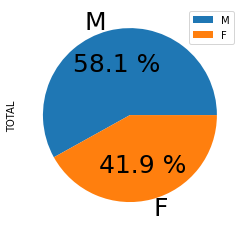

=================== AGE DISTRIBUTION =======================
(31, 14)


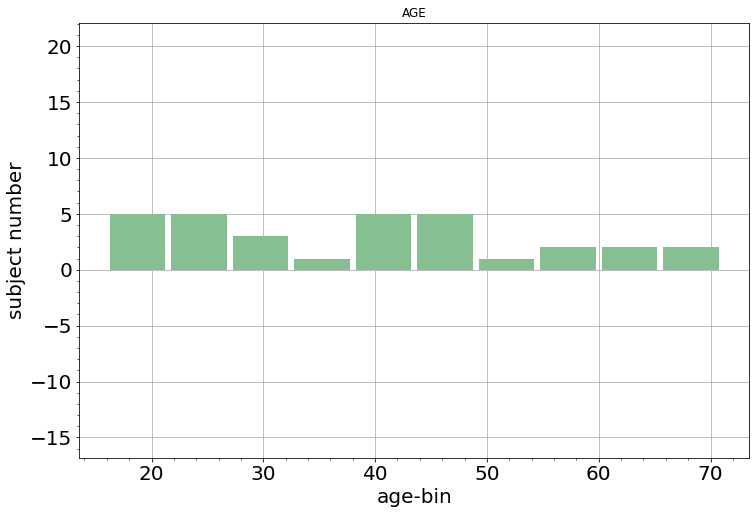

=================== Body Mass Index of all participants =======================


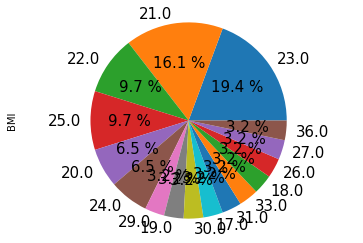

In [4]:
print(f'=================== GENDER =======================')
basic_demographics['SEX'].value_counts().plot.pie(autopct='%.1f %%', 
                                                  ylabel='TOTAL', 
                                                  legend=True, 
                                                  textprops={'fontsize': 25})
# plt.axis('equal')
plt.savefig('plot_sex.png')
plt.show()
basic_demographics['SEX']


print(f'=================== AGE DISTRIBUTION =======================')
print(basic_demographics.shape)

basic_demographics.hist(column='AGE', bins=10, figsize=(12,8), grid=False, color='#86bf91', zorder=2, rwidth=0.9)
plt.axis('equal')
plt.xlabel('age-bin', fontsize=20)
plt.ylabel('subject number', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
plt.minorticks_on()
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('plot_age.png')
plt.show()

print(f'=================== Body Mass Index of all participants =======================')
basic_demographics['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='BMI', legend=False, 
                                                  textprops={'fontsize': 15})
plt.axis('equal')
plt.savefig('plot_bmi.png')
plt.show()




=================== LABELLED =======================
Y    31
Name: LABELLED, dtype: int64


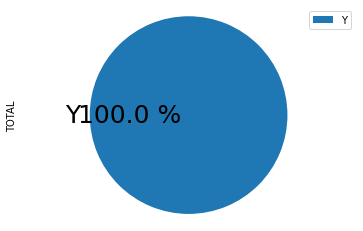

In [5]:
print(f'=================== LABELLED =======================')
print(basic_demographics['LABELLED'].value_counts())
basic_demographics['LABELLED'].value_counts().plot.pie(autopct='%.1f %%', ylabel='TOTAL', legend=True, textprops={'fontsize': 25})
plt.axis('equal')
plt.savefig('plot_labelled.png')
plt.show()


=================== GENDER, SEPSIS =======================


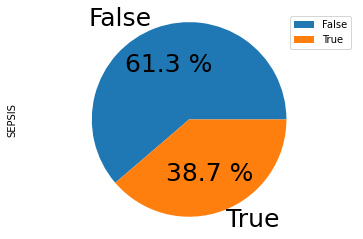

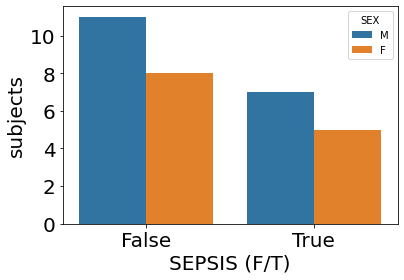

In [6]:
print(f'=================== GENDER, SEPSIS =======================')
basic_demographics['SEPSIS'].value_counts().plot.pie(autopct='%.1f %%', ylabel='SEPSIS', legend=True, textprops={'fontsize': 25})
plt.axis('equal')
plt.savefig('plot_sepsis.png')
plt.show()

sns.countplot(data=basic_demographics,x='SEPSIS',hue='SEX')
plt.xlabel('SEPSIS (F/T)', fontsize=20)
plt.ylabel('subjects', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('plot_sepsis_sex.png')
plt.show()



=================== GENDER, DENGUE =======================


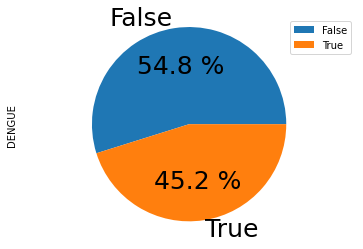

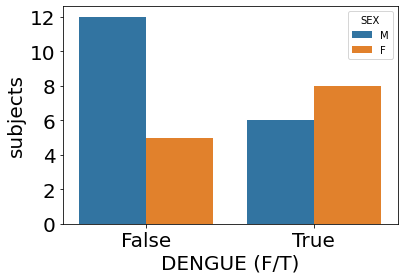

In [7]:
print(f'=================== GENDER, DENGUE =======================')

basic_demographics['DENGUE'].value_counts().plot.pie(autopct='%.1f %%', ylabel='DENGUE', legend=True, textprops={'fontsize': 25})
plt.axis('equal')
plt.savefig('plot_dengue.png')
plt.show()

sns.countplot(data=basic_demographics,x='DENGUE',hue='SEX')
plt.xlabel('DENGUE (F/T)', fontsize=20)
plt.ylabel('subjects', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('plot_dengue_sex.png')
plt.show()



=================== GENDER, TETANUS =======================


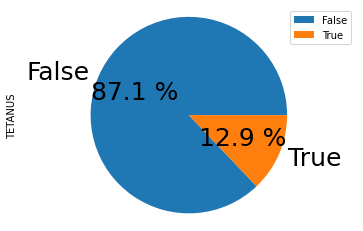

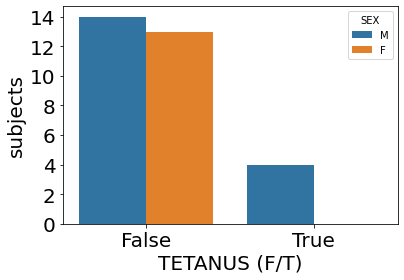

In [8]:
print(f'=================== GENDER, TETANUS =======================')
basic_demographics['TETANUS'].value_counts().plot.pie(autopct='%.1f %%', ylabel='TETANUS', legend=True, textprops={'fontsize': 25})
plt.axis('equal')
plt.savefig('plot_tetanus.png')
plt.show()

sns.countplot(data=basic_demographics,x='TETANUS',hue='SEX')
plt.xlabel('TETANUS (F/T)', fontsize=20)
plt.ylabel('subjects', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('plot_tetanus_sex.png')
plt.show()


=================== GENDER, ADMITTEDICU =======================


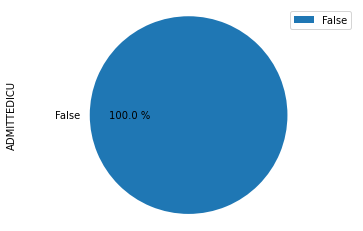

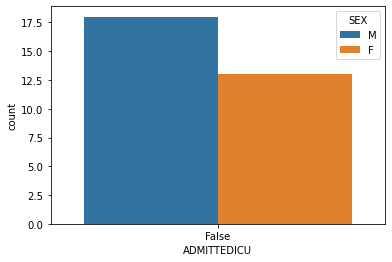

In [9]:
print(f'=================== GENDER, ADMITTEDICU =======================')

basic_demographics['ADMITTEDICU'].value_counts().plot.pie(autopct='%.1f %%', ylabel='ADMITTEDICU', legend=True)
plt.axis('equal')
plt.show()

sns.countplot(data=basic_demographics,x='ADMITTEDICU',hue='SEX')
plt.show()



=================== GENDER, POINTCARE =======================


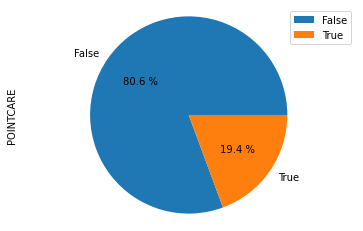

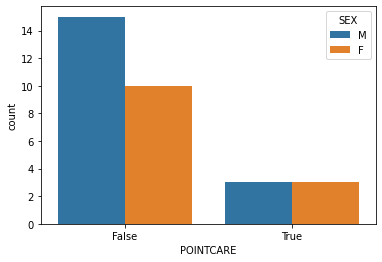

In [10]:
print(f'=================== GENDER, POINTCARE =======================')

basic_demographics['POINTCARE'].value_counts().plot.pie(autopct='%.1f %%', ylabel='POINTCARE', legend=True)
plt.axis('equal')
plt.show()

sns.countplot(data=basic_demographics,x='POINTCARE',hue='SEX')
plt.show()

=================== Body Mass Index plots for participants with/without SEPSIS =======================


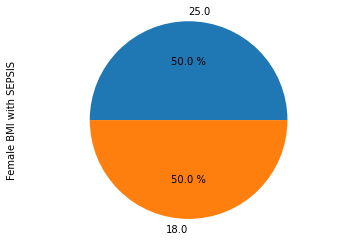

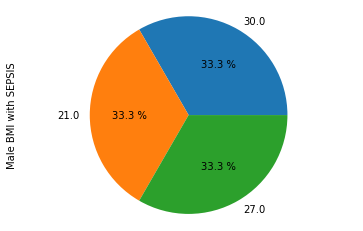

/home/mx19/anaconda3/envs/echo-paper-ve/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


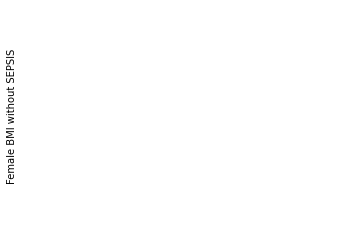

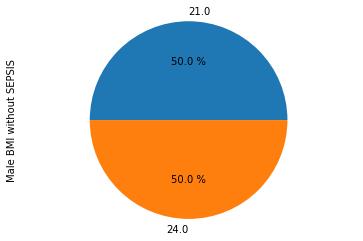

In [11]:
print(f'=================== Body Mass Index plots for participants with/without SEPSIS =======================')

AGE_LIMIT = 50
bdA = basic_demographics[(basic_demographics["AGE"] > AGE_LIMIT) & 
                         (basic_demographics["SEX"] =='F') & 
                         (basic_demographics["SEPSIS"] == 1)  ]
bdA['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='Female BMI with SEPSIS', legend=False)
plt.axis('equal')
plt.show()

bdA = basic_demographics[ (basic_demographics["AGE"] > AGE_LIMIT) & 
                         (basic_demographics["SEX"] =='M') & 
                         (basic_demographics["SEPSIS"] == 1)  ]
bdA['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='Male BMI with SEPSIS', legend=False)
plt.axis('equal')
plt.show()

bdA = basic_demographics[ (basic_demographics["AGE"] > AGE_LIMIT) & 
                         (basic_demographics["SEX"] =='F') & 
                         (basic_demographics["SEPSIS"] == 0)  ]
bdA['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='Female BMI without SEPSIS', legend=False)
plt.axis('equal')
plt.show()

bdA = basic_demographics[ (basic_demographics["AGE"] > AGE_LIMIT) & 
                         (basic_demographics["SEX"] =='M') & 
                         (basic_demographics["SEPSIS"] == 0)  ]
bdA['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='Male BMI without SEPSIS', legend=False)
plt.axis('equal')
plt.show()



=================== Body Mass Index plots for participants with/without DENGUE =======================


/home/mx19/anaconda3/envs/echo-paper-ve/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


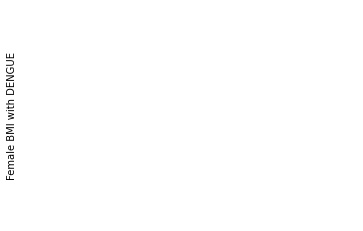

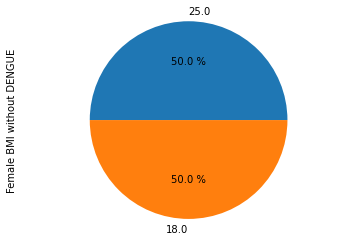

/home/mx19/anaconda3/envs/echo-paper-ve/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


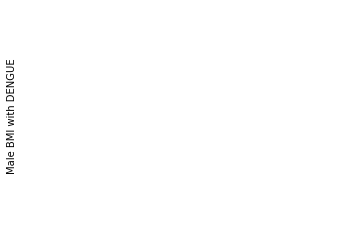

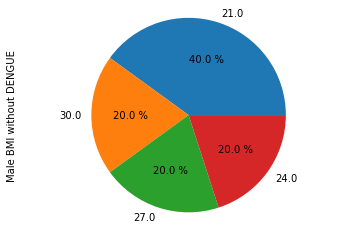

In [12]:
print(f'=================== Body Mass Index plots for participants with/without DENGUE =======================')
AGE_LIMIT = 50

bdA = basic_demographics[ (basic_demographics["AGE"] > AGE_LIMIT) & 
                         (basic_demographics["SEX"] =='F') & 
                         (basic_demographics["DENGUE"] == 1)  ]
bdA['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='Female BMI with DENGUE', legend=False)
plt.axis('equal')
plt.show()

bdA = basic_demographics[ (basic_demographics["AGE"] > AGE_LIMIT) & 
                         (basic_demographics["SEX"] =='F') & 
                         (basic_demographics["DENGUE"] == 0)  ]
bdA['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='Female BMI without DENGUE', legend=False)
plt.axis('equal')
plt.show()


bdA = basic_demographics[ (basic_demographics["AGE"] > AGE_LIMIT) & 
                         (basic_demographics["SEX"] =='M') & 
                         (basic_demographics["DENGUE"] == 1)  ]
bdA['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='Male BMI with DENGUE', legend=False)
plt.axis('equal')
plt.show()

bdA = basic_demographics[ (basic_demographics["AGE"] > AGE_LIMIT) & 
                         (basic_demographics["SEX"] =='M') & 
                         (basic_demographics["DENGUE"] == 0)  ]
bdA['BMI'].value_counts().plot.pie(autopct='%.1f %%', ylabel='Male BMI without DENGUE', legend=False)
plt.axis('equal')
plt.show()




=================== GENDER, SMOKER =======================


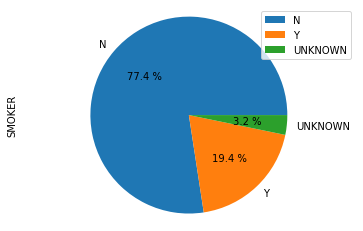

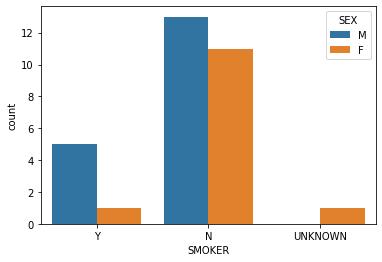

In [13]:
print(f'=================== GENDER, SMOKER =======================')
basic_demographics['SMOKER'].value_counts().plot.pie(autopct='%.1f %%', ylabel='SMOKER', legend=True)
plt.axis('equal')
plt.show()

sns.countplot(data=basic_demographics,x='SMOKER',hue='SEX')
plt.show()

=================== GENDER, TAKINGMED =======================


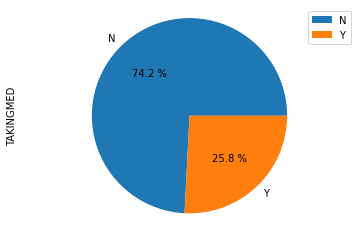

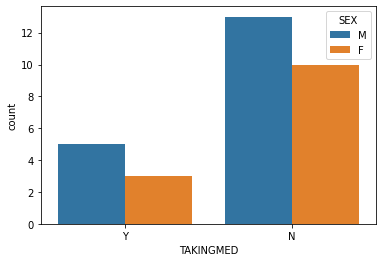

In [14]:
print(f'=================== GENDER, TAKINGMED =======================')
basic_demographics['TAKINGMED'].value_counts().plot.pie(autopct='%.1f %%', ylabel='TAKINGMED', legend=True)
plt.axis('equal')
plt.show()

sns.countplot(data=basic_demographics,x='TAKINGMED',hue='SEX')
plt.show()

In [15]:
## TODO
## *ANNOTATIONS (4CV,BGR) T1,T2,T3 

